<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday'

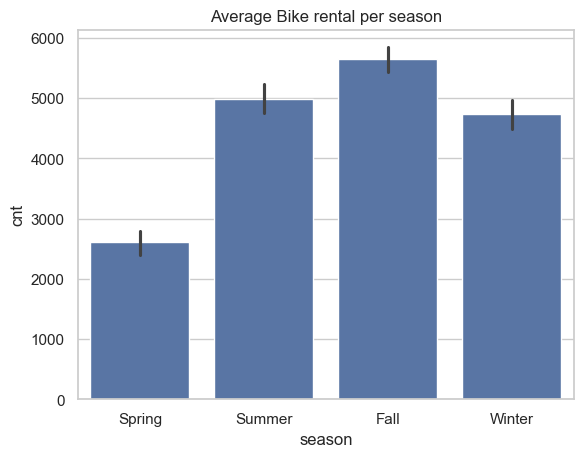

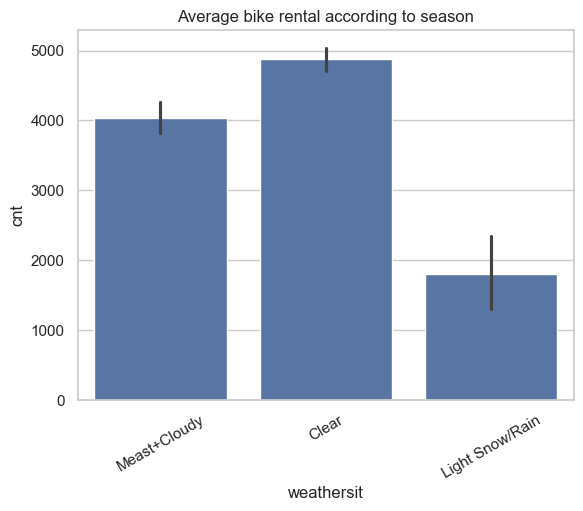

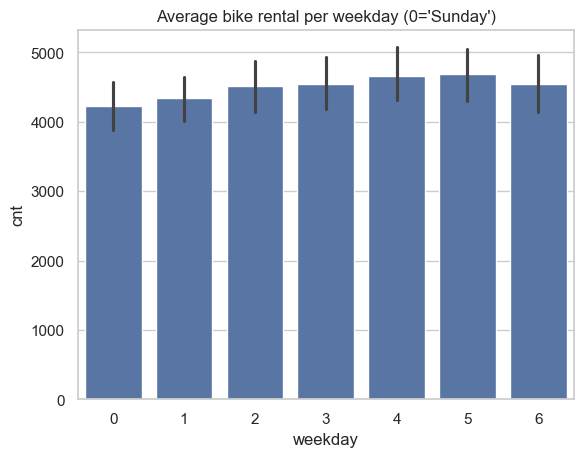

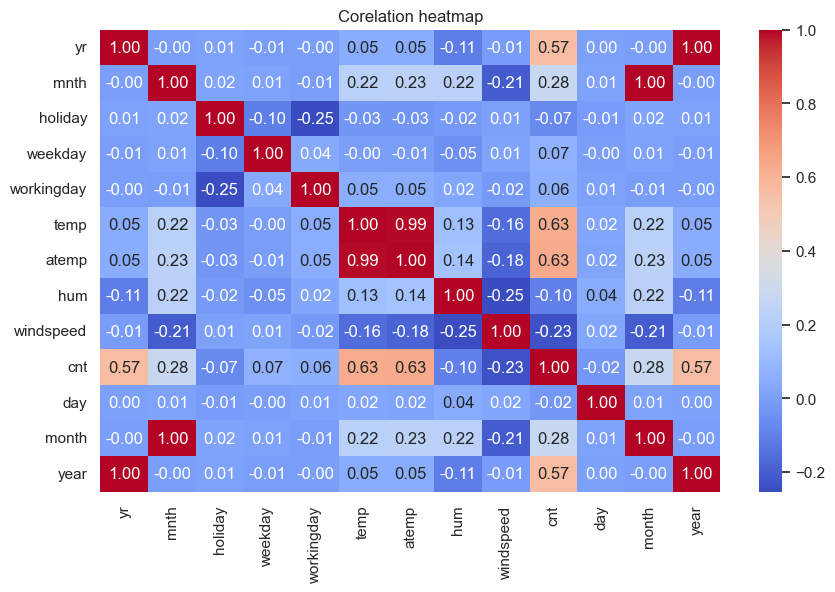

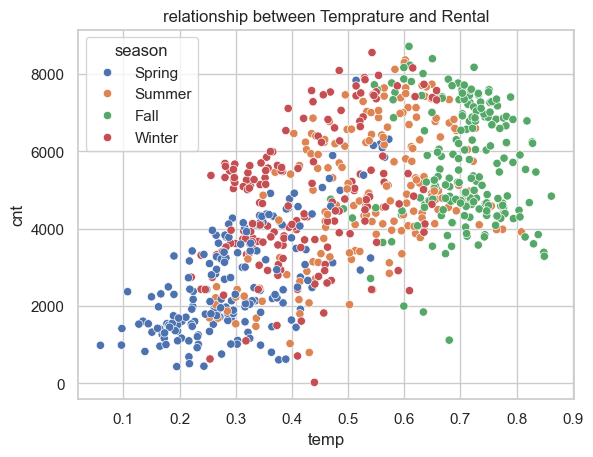

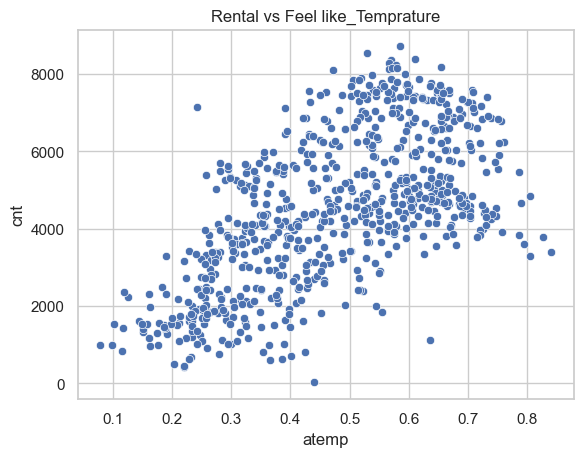

Epoch 1/100


C:\Users\hamza\Miniconda3\envs\tf_dl\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4555.5693 - mae: 4555.5693 - val_loss: 4277.8398 - val_mae: 4277.8398
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4579.0557 - mae: 4579.0557 - val_loss: 4275.6865 - val_mae: 4275.6865
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4655.3657 - mae: 4655.3657 - val_loss: 4271.1748 - val_mae: 4271.1748
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4492.4932 - mae: 4492.4932 - val_loss: 4261.9360 - val_mae: 4261.9360
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4470.4878 - mae: 4470.4878 - val_loss: 4245.9419 - val_mae: 4245.9419
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4538.3076 - mae: 4538.3076 - val_loss: 4220.3545 - val_mae: 4220.3545
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4424.1875 - mae: 4424.1875 - val_loss: 4182.4150 - val_mae: 4182.4150
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4515.3550 - mae: 4515.3550 - val_loss: 4129.3188 -

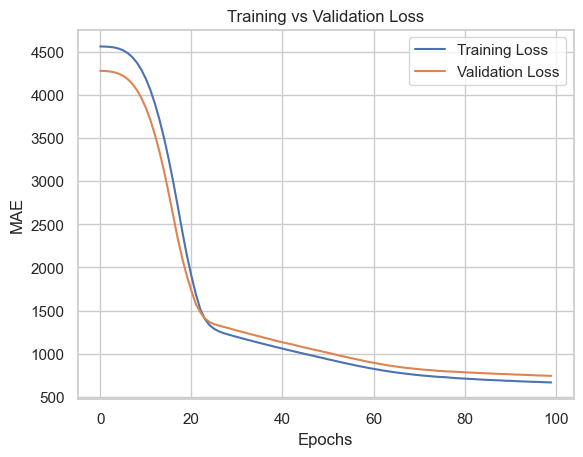

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
MAE: 744.24 rentals
R² Score: 0.74


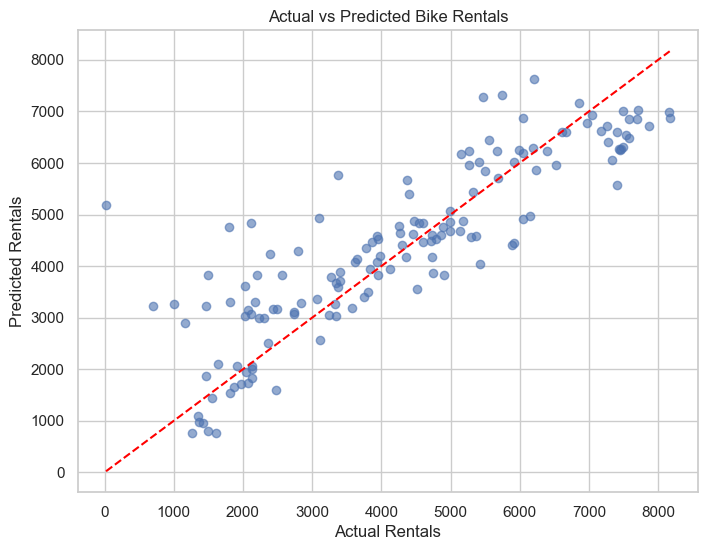

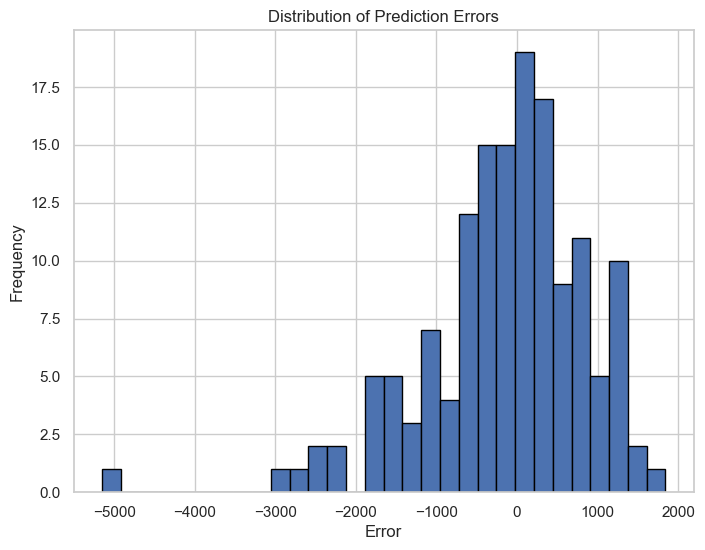

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np






df = pd.read_csv("day.csv")
df.head()

df.info() # for the basic info 
df.describe() # for the data summary 
print(df.columns) # i used it for all coulmn names 
print(df.isnull().sum()) # check any value null 


# I have seen the data , and its nature 
#lets move to the next step and that is data cleaning or preparing the data

# we already learned in deepl and ml its not necessayr to use irelevent coulmns or feature in data 


# so I am gonna drop some unnessary coulmns 
df.drop(['instant','casual','registered'], axis=1 , inplace=True)

# we have one coulmn which name is dteday and we will convert it into date and time and will extract feature 

#Remove any leading/trailing spaces from column names to avoid key errors
df.columns=df.columns.str.strip()

df['dteday'] = pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year
df.drop('dteday', axis=1, inplace=True)



# its time to do some label decoding 
# so we are replacing numaric code with labels lets see 
df['season']= df['season'].map(
    {
        1:'Spring',
        2:'Summer',
        3:'Fall',
        4:'Winter',
    })
df['weathersit']= df['weathersit'].map({
    1:'Clear',
    2:'Meast+Cloudy',
    3:'Light Snow/Rain',
    4:'Heavy Rain/Ice',
})

df.head()


# lets move to data visulization to better understanding of data nad which feature are important and waht are relationship between them 
# this thing I have learned in DataVisulization certification of kaggle
sns.set(style="whitegrid")

sns.barplot(data=df , x='season', y='cnt')
plt.title('Average Bike rental per season')
plt.show()

sns.barplot(data=df, x='weathersit', y='cnt')
plt.title('Average bike rental according to season')
plt.xticks(rotation=30) # if labels are too long use this 
plt.show()


sns.barplot(data=df, x='weekday', y='cnt')
plt.title("Average bike rental per weekday (0='Sunday')")
plt.show()




# lets see how strongly our numerical features are related to each other 
# this thing I have learned in DataVisulization certification of kaggle

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True , cmap='coolwarm' , fmt='.2f')
plt.title('Corelation heatmap')
plt.show()


# now its time to see relationship between some features like 
sns.scatterplot(data=df , x='temp', y='cnt', hue='season')
plt.title('relationship between Temprature and Rental')
plt.show()


sns.scatterplot(data=df, x='atemp', y='cnt')
plt.title('Rental vs Feel like_Temprature')
plt.show()



# now lets move to the next step and that is prepare data for training this thing I have learned in intro ML kaggle course

# what we want to predict that is  target  cnt 
y= df['cnt']
x= df.drop('cnt', axis =1)

# convert categorical coulmns into hot encoding 
x=pd.get_dummies(x, drop_first=True)


# now its time to divide our data into two subset one is going to use for trainigna nd another is going to use for testing 

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)


# Scale features to range [0, 1] to ensure all variables contribute equally to the model
# Fitting is done only on training data to avoid data leakage into the test set
scaler = MinMaxScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)



# now its time to define  and compile the model 

model = keras.Sequential([
    layers.Dense(64,activation='relu', input_shape=[x_train_scaled.shape[1]]),
    layers.Dense(32,activation='relu'),
    layers.Dense(1),
])


# lets comiple the model 
model.compile(
    optimizer='adam',
    loss='mae', #common loss of function for regression problems 
    metrics=['mae']
    
)


# lets move to the next step and that is how to train the model and its very important
early_stop=EarlyStopping(
    patience=10, # wait 10 opche before stopping 
    restore_best_weights=True,
    min_delta=1
    
)


history = model.fit(
     x_train_scaled,y_train,
    validation_data=(x_test_scaled,y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
    
    
)


#lets plot learning curve 

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()



#now its time to evaluate model performance 
# we made a model which is predcited 


y_pred = model.predict(x_test_scaled).flatten()  # prediction on test dataset 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} rentals")
print(f"R² Score: {r2:.2f}")


# we have gotten number what is difference in prediction and actuallly npw we should plot them 
# in two ways one is scatter and anotehr ishistogram which (histogram of prdiction and error )

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs Predicted Bike Rentals')
plt.grid(True)
plt.show()

errors = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





